In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean

# plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Fri Dec 11 09:28:44 2020


In [2]:
# file1 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_visEq_1s_W0028_F03-200228-095644-1.csv"
file1 ="/QuantumRouter/AOD1282020/AOD_10s_CW_splitter_1kHz_GW10us_W0028_H07-201208-120128.csv"
print (file1, time.ctime())

# data1=np.loadtxt(file1, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data1 = np.genfromtxt(file1, delimiter=",", skip_header=True)[:, 1:]
data1 = pd.read_csv(file1)
print(pd.read_csv(file1, nrows=5))
print(time.ctime())
# #print data
# y1   = data1.iloc[:, 0]
# x1   = data1.iloc[:, 1]
# t1   = data1.iloc[:, 2]
# a1   = data1.iloc[:, 3]
# A1   = data1.iloc[:, 4]

# for i in range(0,20):
#     print (i, x1[i],y1[i],t1[i],a1[i],A1[i])
    
# print (len(t1), time.ctime())

# # file2 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_SettingsEq_1s_W0028_F03-200228-100050-1.csv"
# file2 = "/QuantumRouter/AOD1282020/AOD_10s_CW_splitter_1kHz_GW10us_W0028_H07-201208-120128_cent.csv"
# print (file2, time.ctime())

# # data2=np.loadtxt(file2, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# # data2 = np.genfromtxt(file2, delimiter=",", skip_header=True)[:, 1:]
# data2 =pd.read_csv(file2)
# print(pd.read_csv(file2, nrows=5))
# print(time.ctime())
# # #print data
# # y2  = data2.iloc[:, 0]
# # x2  = data2.iloc[:, 1]
# # t2  = data2.iloc[:, 2]
# # a2  = data2.iloc[:, 3]
# # A2  = data2.iloc[:, 4]

# # for i in range(0,20):
# #     print (i, x2[i],y2[i],t2[i],a2[i],A2[i])
    
# # print (len(t2), time.ctime())

/QuantumRouter/AOD1282020/AOD_10s_CW_splitter_1kHz_GW10us_W0028_H07-201208-120128.csv Fri Dec 11 09:28:44 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0    37    64  157211149056       6025          240150         NaN
1    35    61  157211148800         75          240150         NaN
2    34    62  157211148800       5700          240150         NaN
3    35    64  157211148800       4350          240150         NaN
4    35    65  157211148800       2275          240150         NaN
Fri Dec 11 09:29:39 2020


In [3]:
data1.shape

(141670626, 6)

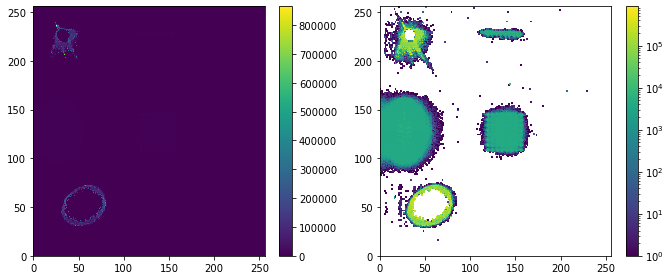

In [4]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

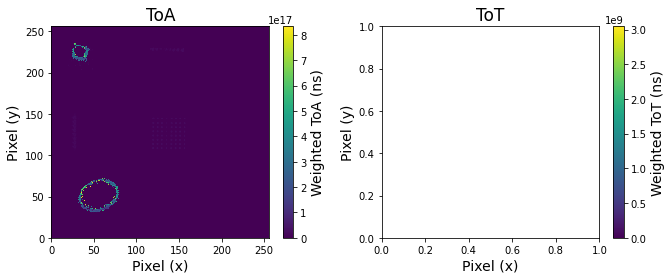

In [23]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
# data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)]
h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToA'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToT[arb]'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

In [5]:
# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv"
GridX1min = 115
GridX1max = 160
GridY1min = 105
GridY1max = 150

# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv"
GridX2min = 118
GridX2max = 161
GridY2min = 108
GridY2max = 151

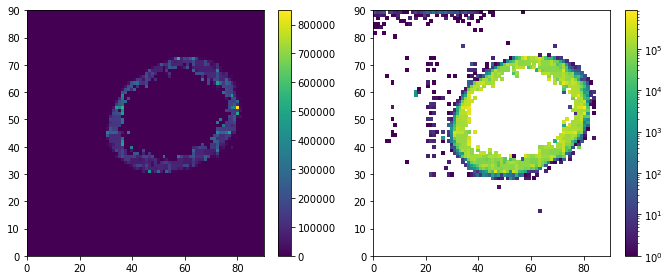

In [6]:
#File 1 splitspot

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 80, range = [(0, 90), (0, 90)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins =80, range = [(0, 90), (0, 90)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
# fig.savefig('fullgrid_8212020_025044-1_cent.png')

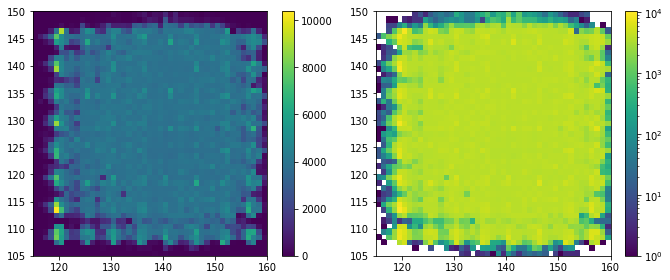

In [7]:
#File 1 grid

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
# fig.savefig('fullgrid_8212020_025044-1_cent.png')

In [8]:
256-180

76

Text(0.5, 1.0, 'Grid')

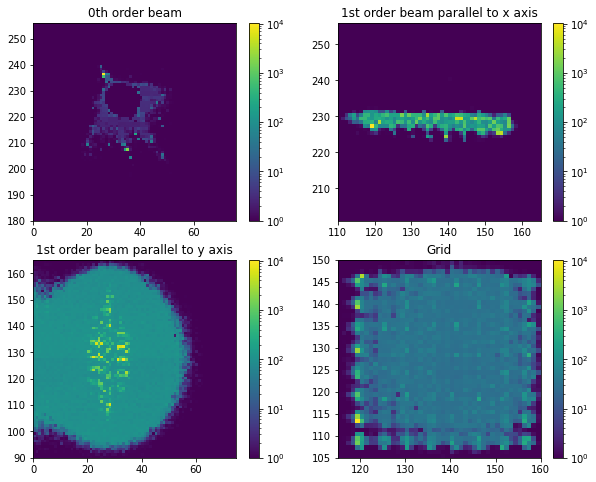

In [9]:
#Display 1th order bottom spot

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))

h1 = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 76, range = [(0, 76), (180, 256)])
fig.colorbar(h[3], ax = ax1)
ax1.set_title('0th order beam')

h2 = ax2.hist2d(data1['#Row'], data1['#Col'], bins = 55, range = [(110, 165), (201,256)])
fig.colorbar(h[3], ax = ax2)
ax2.set_title('1st order beam parallel to x axis')

h3 = ax3.hist2d(data1['#Row'], data1['#Col'], bins = 75, range = [(0, 75), (90, 165)])
fig.colorbar(h[3], ax = ax3)
ax3.set_title('1st order beam parallel to y axis')

h4 = ax4.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax4)
ax4.set_title('Grid')


In [10]:
def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
    """Returns DataFrame filtering values less than min or greater than max for two columns"""
    x_cond = (data['#Row'] <grid_x_min) | (data['#Row'] > grid_x_max)
    y_cond = (data['#Col'] < grid_y_min) | (data['#Col'] > grid_y_max)
    new_data = data.drop(data[x_cond | y_cond].index)
    return new_data

grid1_df = min_max(data1, GridX1min, GridX1max, GridY1min, GridY1max)

print(grid1_df.shape, type(grid1_df.iloc[0,0]), type(grid1_df.iloc[1,1]), time.ctime())
print(grid1_df.iloc[:3])

# grid2_df = min_max(data2, GridX2min, GridX2max, GridY2min, GridY2max)

# print(grid2_df.shape, type(grid2_df.iloc[0,0]), type(grid2_df.iloc[1,1]), time.ctime())
# print(grid2_df.iloc[:3])

(6200305, 6) <class 'numpy.int64'> <class 'numpy.float64'> Fri Dec 11 09:32:58 2020
     #Col   #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
63    129  120.0  1.572112e+11     4425.0          5875.0         NaN
64    130  120.0  1.572111e+11     1450.0          5875.0         NaN
284   129  125.0  1.572112e+11     2750.0          4225.0         NaN


In [11]:
splitspot_df = min_max(data1, 0, 90, 0, 90)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(splitspot_df.shape, type(splitspot_df.iloc[0,0]), type(splitspot_df.iloc[1,1]), time.ctime())
print(splitspot_df.iloc[:3])

(71220579, 6) <class 'numpy.int64'> <class 'numpy.float64'> Fri Dec 11 09:33:46 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0    37  64.0  1.572111e+11     6025.0        240150.0         NaN
1    35  61.0  1.572111e+11       75.0        240150.0         NaN
2    34  62.0  1.572111e+11     5700.0        240150.0         NaN


In [12]:
oth_df = min_max(data1, 0, 76, 180, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(oth_df.shape, type(oth_df.iloc[0,0]), type(oth_df.iloc[1,1]), time.ctime())
print(oth_df.iloc[:3])

(50670057, 6) <class 'numpy.int64'> <class 'numpy.float64'> Fri Dec 11 09:34:59 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
65   220  38.0  1.572112e+11    25550.0        432475.0         NaN
66   227  42.0  1.572111e+11     2100.0        432475.0         NaN
67   227  41.0  1.572111e+11     4850.0        432475.0         NaN


In [13]:
X_df = min_max(data1, 110, 165, 201, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(X_df.shape, type(X_df.iloc[0,0]), type(X_df.iloc[1,1]), time.ctime())
print(X_df.iloc[:3])

(1060785, 6) <class 'numpy.int64'> <class 'numpy.float64'> Fri Dec 11 09:36:45 2020
     #Col   #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
274   228  149.0  1.572111e+11      500.0         16825.0         NaN
275   229  150.0  1.572111e+11       25.0         16825.0         NaN
276   227  148.0  1.572111e+11      300.0         16825.0         NaN


In [14]:
Y_df = min_max(data1, 0, 75, 90, 165)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Y_df.shape, type(Y_df.iloc[0,0]), type(Y_df.iloc[1,1]), time.ctime())
print(Y_df.iloc[:3])

(12506936, 6) <class 'numpy.int64'> <class 'numpy.float64'> Fri Dec 11 09:38:04 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
341   136  26.0  1.572111e+11      375.0           375.0         NaN
461   109  28.0  1.572112e+11     1975.0          1975.0         NaN
476   142  28.0  1.572112e+11      850.0           850.0         NaN


In [17]:
print("Grid start:",(grid1_df['#ToA'].min()/4096.*25.)*10**(-3),"us")
print("0th start:",(oth_df['#ToA'].min()/4096.*25.)*10**(-3),"us")
print("Y bar start:",(Y_df['#ToA'].min()/4096.*25.)*10**(-3),"us")
print("X bar start:",(X_df['#ToA'].min()/4096.*25.)*10**(-3),"us")
print("Splitter spot start:",(splitspot_df['#ToA'].min()/4096.*25.)*10**(-3),"us")
print("Difference between Y and 0th:",((Y_df['#ToA'].min()/4096.*25.)-(oth_df['#ToA'].min()/4096.*25.)),"ns")
print("Difference between X and 0th:",((X_df['#ToA'].min()/4096.*25.)-(oth_df['#ToA'].min()/4096.*25.)),"ns")
print("Difference between Grid and 0th:",((grid1_df['#ToA'].min()/4096.*25.)-(oth_df['#ToA'].min()/4096.*25.)),"ns")
print("Difference between 0th and splitter spot:",((oth_df['#ToA'].min()/4096.*25.)-(splitspot_df['#ToA'].min()/4096.*25.)),"ns")
print("Difference between Y and splitter spot:",((Y_df['#ToA'].min()/4096.*25.)-(splitspot_df['#ToA'].min()/4096.*25.)),"ns")
print("Difference between X and splitter spot:",((X_df['#ToA'].min()/4096.*25.)-(splitspot_df['#ToA'].min()/4096.*25.)),"ns")

Grid start: 959540.703125 us
0th start: 959540.703125 us
Y bar start: 959540.7078125001 us
X bar start: 959540.7046875 us
Splitter spot start: 959540.703125 us
Difference between Y and 0th: 4.6875 ns
Difference between X and 0th: 1.5625 ns
Difference between Grid and 0th: 0.0 ns
Difference between 0th and splitter spot: 0.0 ns
Difference between Y and splitter spot: 4.6875 ns
Difference between X and splitter spot: 1.5625 ns


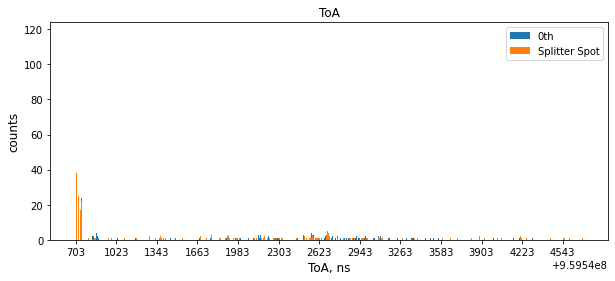

In [20]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
# (n, bins, patches) = plt.hist(grid1_df['#ToA']/4096.*25., bins = 1000,range = (grid1_df['#ToA'].min()/4096.*25., (grid1_df['#ToA'].min()/4096.*25.)+4000), label='grid')
(n, bins, patches) = plt.hist(oth_df['#ToA']/4096.*25., bins = 1000, range = (oth_df['#ToA'].min()/4096.*25., (oth_df['#ToA'].min()/4096.*25.)+4000), label='0th')
# plt.hist(Y_df['#ToA']/4096.*25., bins = 1000, range = (Y_df['#ToA'].min()/4096.*25., (Y_df['#ToA'].min()/4096.*25.)+4000), label='Y bar')
# plt.hist(X_df['#ToA']/4096.*25., bins = 1000, range = (X_df['#ToA'].min()/4096.*25., (X_df['#ToA'].min()/4096.*25.)+4000), label='X bar')
plt.hist(splitspot_df['#ToA']/4096.*25., bins = 1000, range = (splitspot_df['#ToA'].min()/4096.*25., (splitspot_df['#ToA'].min()/4096.*25.)+4000), label='Splitter Spot')
plt.title("ToA", fontsize = 12) # change the title
plt.xlabel('ToA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.legend(loc='upper right')
plt.xticks(bins[::80])
plt.show()

In [18]:
# # fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
# (n, bins, patches) = plt.hist(grid1_df['#ToA']/4096.*25., bins = 1000,range = (grid1_df['#ToA'].min()/4096.*25., (grid1_df['#ToA'].min()/4096.*25.)+5000000), label='grid')
# plt.hist(oth_df['#ToA']/4096.*25., bins = 1000, range = (oth_df['#ToA'].min()/4096.*25., (oth_df['#ToA'].min()/4096.*25.)+5000000), label='0th')
# plt.hist(Y_df['#ToA']/4096.*25., bins = 1000, range = (Y_df['#ToA'].min()/4096.*25., (Y_df['#ToA'].min()/4096.*25.)+5000000), label='Y bar')
# plt.hist(X_df['#ToA']/4096.*25., bins = 1000, range = (X_df['#ToA'].min()/4096.*25., (X_df['#ToA'].min()/4096.*25.)+5000000), label='X bar')
# plt.title("ToA", fontsize = 12) # change the title
# plt.xlabel('ToA, ns',fontsize = 12)
# plt.ylabel('counts',fontsize = 12)
# plt.legend(loc='upper right')
# plt.xticks(bins[::80])
# plt.show()

In [21]:
# (n, bins, patches) = plt.hist(grid1_df['#ToA']/4096.*25., bins = 1000,range = (grid1_df['#ToA'].min()/4096.*25., (grid1_df['#ToA'].min()/4096.*25.)+4000), label='grid')
# plt.hist(oth_df['#ToA']/4096.*25., bins = 1000, range = (oth_df['#ToA'].min()/4096.*25., (oth_df['#ToA'].min()/4096.*25.)+4000), label='0th')
# plt.hist(Y_df['#ToA']/4096.*25., bins = 1000, range = (Y_df['#ToA'].min()/4096.*25., (Y_df['#ToA'].min()/4096.*25.)+4000), label='Y bar')
# plt.hist(X_df['#ToA']/4096.*25., bins = 1000, range = (X_df['#ToA'].min()/4096.*25., (X_df['#ToA'].min()/4096.*25.)+4000), label='X bar')
# plt.title("ToA", fontsize = 12) # change the title
# plt.xlabel('ToA, ns',fontsize = 12)
# plt.ylabel('counts',fontsize = 12)
# plt.legend(loc='upper right')
# plt.xticks(bins[::80])
# plt.show()

In [22]:
for i in range(100):
    ToAmin = (data1['#ToA'].min()-(500000*4096./25.))+((i*1000000)*4096./25.)
    ToAmax = ToAmin+(1000000*4096./25.)
    globals()["grid1_pulse"+str(i)+"_df"] = \
    grid1_df.drop(grid1_df[(grid1_df['#ToA'] < ToAmin) | (grid1_df['#ToA'] > ToAmax)].index)

In [23]:
# # Find peaks from which to subtract offset for each peak
# for i in range(100):
#     globals()["grid1_pulse"+str(i)+"_sort_df"] = \
#     globals()["grid1_pulse"+str(i)+"_df"].drop(globals()["grid1_pulse"+str(i)+"_df"][globals()["grid1_pulse"+str(i)+"_df"]['#ToT[arb]'] < 1000].index)
#     globals()["grid1_pulse"+str(i)+"_max_df"] = \
#     globals()["grid1_pulse"+str(i)+"_sort_df"][globals()["grid1_pulse"+str(i)+"_sort_df"]['#ToT[arb]'] == (globals()["grid1_pulse"+str(i)+"_sort_df"]['#ToT[arb]'].max())]
# #     print(globals()["grid1_pulse"+str(i)+"_max_df"].shape, globals()["grid1_pulse"+str(i)+"_max_df"].iloc[:2])
#     if globals()["grid1_pulse"+str(i)+"_max_df"].shape[0] > 1:
#         globals()["grid1_pulse"+str(i)+"_max_df"] = \
#         globals()["grid1_pulse"+str(i)+"_max_df"][globals()["grid1_pulse"+str(i)+"_max_df"]['#ToTtotal[arb]'] == (globals()["grid1_pulse"+str(i)+"_sort_df"]['#ToTtotal[arb]'].max())]
#         print(globals()["grid1_pulse"+str(i)+"_max_df"].shape, globals()["grid1_pulse"+str(i)+"_max_df"].iloc[:2])

In [28]:
# # Subtract offset
# for i in range(100):
#     globals()['grid1_pulse'+str(i)+'_df']['#ToA'] = \
#     (globals()['grid1_pulse'+str(i)+'_df']['#ToA']/4096.*25.)-((globals()["grid1_pulse"+str(i)+"_max_df"]['#ToA'].max()/4096.*25.)-50)

In [29]:
for i in range(100):
    ToAmin = (data1['#ToA'].min()-(500000*4096./25.))+((i*1000000)*4096./25.)
    ToAmax = ToAmin+(1000000*4096./25.)
    globals()["oth_pulse"+str(i)+"_df"] = \
    oth_df.drop(oth_df[(oth_df['#ToA'] < ToAmin) | (oth_df['#ToA'] > ToAmax)].index)

In [30]:
# for i in range(100):
#     ToAmin = (data1['#ToA'].min()-(500000*4096./25.))+((i*1000000)*4096./25.)
#     ToAmax = ToAmin+(1000000*4096./25.)
#     globals()["Y_pulse"+str(i)+"_df"] = \
#     Y_df.drop(Y_df[(Y_df['#ToA'] < ToAmin) | (Y_df['#ToA'] > ToAmax)].index)

In [31]:
# for i in range(100)::
#     ToAmin = (data1['#ToA'].min()-(500000*4096./25.))+((i*1000000)*4096./25.)
#     ToAmax = ToAmin+(1000000*4096./25.)
#     globals()["X_pulse"+str(i)+"_df"] = \
#     X_df.drop(X_df[(X_df['#ToA'] < ToAmin) | (X_df['#ToA'] > ToAmax)].index)

In [32]:
# print("Grid start:",(grid1_df['#ToA'].min()/4096.*25.)*10**(-3),"us")
# print("0th start:",(oth_df['#ToA'].min()/4096.*25.)*10**(-3),"us")
# print("Y bar start:",(Y_df['#ToA'].min()/4096.*25.)*10**(-3),"us")
# print("X bar start:",(X_df['#ToA'].min()/4096.*25.)*10**(-3),"us")
# print("Difference between Y and 0th:",((Y_df['#ToA'].min()/4096.*25.)-(oth_df['#ToA'].min()/4096.*25.)),"ns")
# print("Difference between X and 0th:",((X_df['#ToA'].min()/4096.*25.)-(oth_df['#ToA'].min()/4096.*25.)),"ns")
# print("Difference between Grid and 0th:",((grid1_df['#ToA'].min()/4096.*25.)-(oth_df['#ToA'].min()/4096.*25.)),"ns")

In [33]:
for i in range(100):
    ToAmin = (data1['#ToA'].min()-(500000*4096./25.))+((i*1000000)*4096./25.)
    ToAmax = ToAmin+(1000000*4096./25.)
    globals()["splitspot_pulse"+str(i)+"_df"] = \
    splitspot_df.drop(splitspot_df[(splitspot_df['#ToA'] < ToAmin) | (splitspot_df['#ToA'] > ToAmax)].index)

KeyboardInterrupt: 

In [ ]:
diff_lst = []
for i in range(100):
    diff_lst.append((globals()["splitspot_pulse"+str(i)+"_df"].min()/4096.*25.)-(globals()["oth_pulse"+str(i)+"_df"].min()/4096.*25.))
    print("Avg difference:",mean(diff_lst),"ns")